https://www.kaggle.com/code/cameronriley/cheesiest-eda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving world_cheese_awards_2021.csv to world_cheese_awards_2021.csv


In [3]:
df = pd.read_csv('world_cheese_awards_2021.csv')
df.head()

,Unnamed: 0,company,product_name,rating,category,country,county
0,0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,NaN
1,1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,NaN
2,2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,NaN
3,3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN
4,4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1741 non-null   int64 
 1   company       1741 non-null   object
 2   product_name  1741 non-null   object
 3   rating        1741 non-null   object
 4   category      1741 non-null   object
 5   country       1741 non-null   object
 6   county        85 non-null     object
dtypes: int64(1), object(6)
memory usage: 95.3+ KB


In [5]:
df.shape

(1741, 7)

In [6]:
#unnamed: 0 is an index column that isn't needed
#county is only applicable to a small portion of the dataset
df.drop(columns = ['Unnamed: 0','county'], inplace = True)

In [7]:
df.head()

,company,product_name,rating,category,country
0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France
1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece
2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy
3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands
4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands


In [8]:
#number of medals won by each country
count_of_medals = df.groupby('country').count().sort_values(by=['rating'],ascending = False)['rating']
count_of_medals

country
Spain                     723
Italy                     320
France                     88
Switzerland                86
United Kingdom             85
Netherlands                80
Austria                    72
USA                        58
Belgium                    29
Portugal                   23
Norway                     22
Germany                    18
Japan                      14
Brazil                     14
Greece                     13
Ireland                    13
Mexico                     12
Canada                      9
South Africa                8
Croatia                     7
Sweden                      6
Hungary                     5
Bosnia and Herzegovina      4
Estonia                     4
Australia                   4
Israel                      4
Liechtenstein               3
Denmark                     3
Lithuania                   2
Colombia                    2
Slovenia                    2
Argentina                   1
Slovakia                    1
Ro

In [9]:
df2 = pd.DataFrame(data = count_of_medals)
df2 = df2.rename(columns={'rating': 'Number of Medals'})
df2

,Number of Medals
country,
Spain,723
Italy,320
France,88
Switzerland,86
United Kingdom,85
Netherlands,80
Austria,72
USA,58
Belgium,29


In [10]:
df2 = df2.reset_index()
df2

,country,Number of Medals
0,Spain,723
1,Italy,320
2,France,88
3,Switzerland,86
4,United Kingdom,85
5,Netherlands,80
6,Austria,72
7,USA,58
8,Belgium,29
9,Portugal,23


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           39 non-null     object
 1   Number of Medals  39 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 752.0+ bytes


In [13]:
#create a df for the count of each countries medals won

temp = df.groupby(['rating','country']).count()['company']
temp

rating      country               
BRONZE      Austria                   34
            Belgium                   14
            Bosnia and Herzegovina     2
            Brazil                    10
            Canada                     2
                                      ..
SUPER GOLD  Spain                     27
            Sweden                     1
            Switzerland                3
            USA                        1
            United Kingdom             8
Name: company, Length: 106, dtype: int64

In [16]:
df3=pd.DataFrame()
df3['Bronze Medals'] = temp['Bronze'] = temp['BRONZE']
df3['Silver Medals'] = temp['SILVER']
df3['Gold Medals'] = temp['GOLD']
df3['Super Gold Medals'] = temp['SUPER GOLD']
df3

,Bronze Medals,Silver Medals,Gold Medals,Super Gold Medals
country,,,,
Austria,34,21,13,4
Belgium,14,6,4,5
Bosnia and Herzegovina,2,2,NaN,NaN
Brazil,10,2,2,NaN
Canada,2,4,2,1
Colombia,1,NaN,1,NaN
Croatia,4,3,NaN,NaN
Denmark,3,NaN,NaN,NaN
Ecuador,1,NaN,NaN,NaN


In [17]:
df3 = df3.reset_index()
df3

,country,Bronze Medals,Silver Medals,Gold Medals,Super Gold Medals
0,Austria,34,21,13,4
1,Belgium,14,6,4,5
2,Bosnia and Herzegovina,2,2,NaN,NaN
3,Brazil,10,2,2,NaN
4,Canada,2,4,2,1
5,Colombia,1,NaN,1,NaN
6,Croatia,4,3,NaN,NaN
7,Denmark,3,NaN,NaN,NaN
8,Ecuador,1,NaN,NaN,NaN
9,Estonia,2,2,NaN,NaN


In [20]:
#create ordered lists of count for each medal group
bronze = df3.sort_values(by ="Bronze Medals", ascending = False)
silver = df3.sort_values(by = "Silver Medals", ascending= False)
gold = df3.sort_values(by ="Gold Medals", ascending=False)
super_gold= df3.sort_values(by = "Super Gold Medals", ascending = False)
df3

,country,Bronze Medals,Silver Medals,Gold Medals,Super Gold Medals
0,Austria,34,21,13,4
1,Belgium,14,6,4,5
2,Bosnia and Herzegovina,2,2,NaN,NaN
3,Brazil,10,2,2,NaN
4,Canada,2,4,2,1
5,Colombia,1,NaN,1,NaN
6,Croatia,4,3,NaN,NaN
7,Denmark,3,NaN,NaN,NaN
8,Ecuador,1,NaN,NaN,NaN
9,Estonia,2,2,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

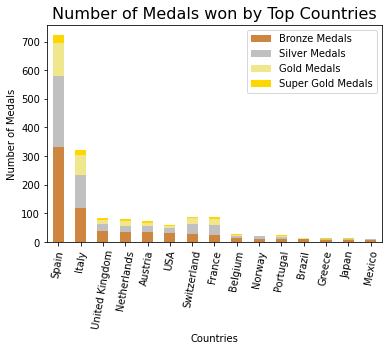

In [22]:
#visualize Medal Distribution
bronze.set_index('country')[:15].plot(kind='bar', stacked=True, color=['peru', 'silver', 'khaki', 'gold'])
plt.title('Number of Medals won by Top Countries', fontsize=16)
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=80)

NameError: ignored

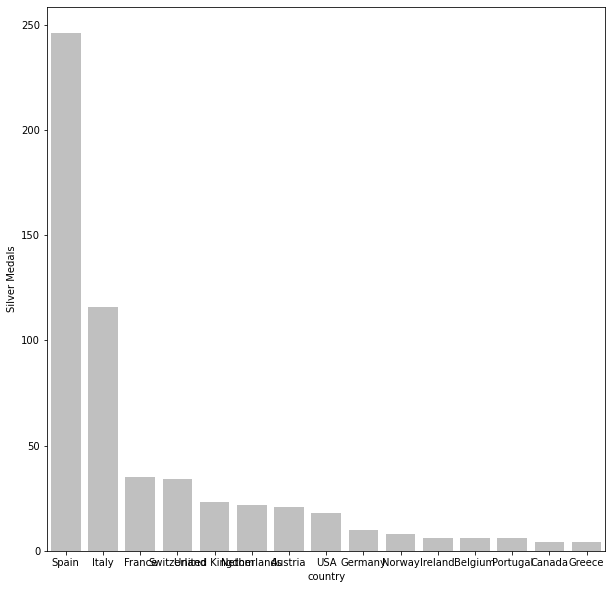

In [24]:
plt.figure(figsize = (10,10))
ax2 = sns.barplot(x=silver['country'][:15], y="Silver Medals", color = 'silver', data=silver)
ax2.set_xticklabels(ax.get_xticklabels(), rotation = 80)
plt.title('Number of Silver Medals won by each country', fontsize=16)
plt.xlabel('Countries')
plt.ylabel('Number of Silver Medals')

NameError: ignored

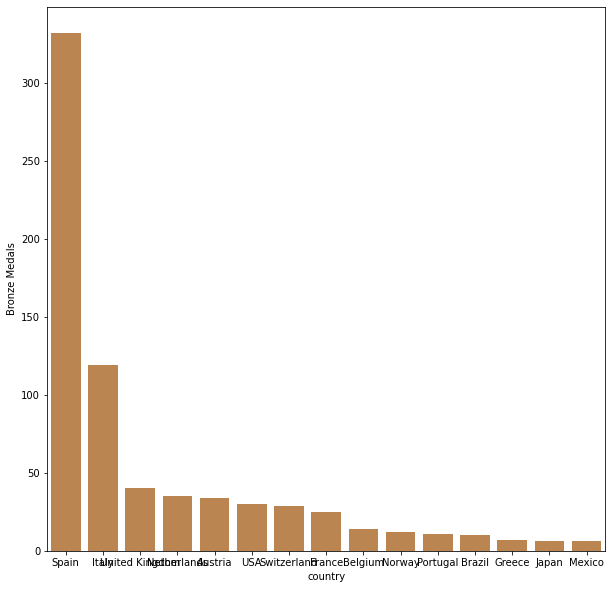

In [26]:
plt.figure(figsize = (10,10))

ax1 = sns.barplot(x=bronze['country'][:15], y="Bronze Medals",color = 'peru', data=bronze)
ax1.set_xticklabels(ax.get_xticklabels(),rotation = 80)
plt.title('Number of Bronze Medals won by each country', fontsize=16)
plt.xlabel('Countries')
plt.ylabel('Number of Bronze Medals')

NameError: ignored

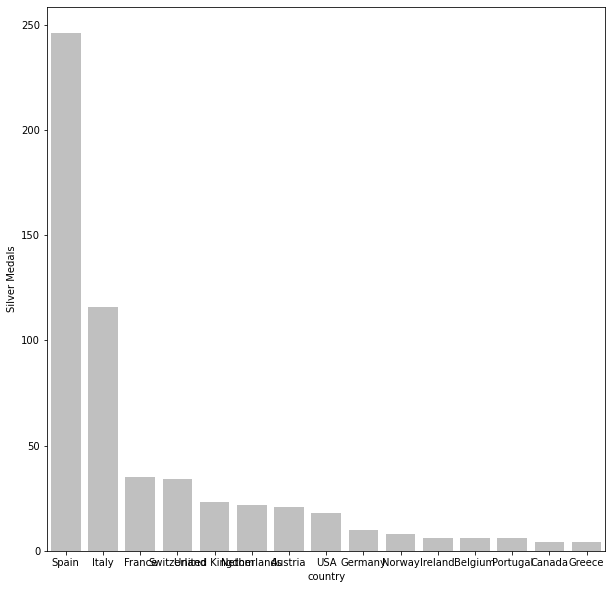

In [27]:
plt.figure(figsize = (10,10))
ax2 = sns.barplot(x=silver['country'][:15], y="Silver Medals", color = 'silver', data=silver)
ax2.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.title('Number of Silver Medals won by each Country', fontsize=16)
plt.xlabel('Countries')
plt.ylabel('Number of Silver Medals')